## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Import Project Datasets (JBOSS)


In [2]:
#All projects are imported here one by one
#variables are adjusted by the sprint progress (30%,50%,80%)
jboss_issue_80 = pd.read_csv("Jboss/jboss_issue_50.csv") #sprint issues at xx% progress
jboss_iter_80 = pd.read_csv("Jboss/jboss_iteration_50.csv", verbose =True , warn_bad_lines = True, error_bad_lines=False) #sprint at xx% progress


Tokenization took: 0.00 ms
Type conversion took: 2.01 ms
Parser memory cleanup took: 0.00 ms


C:\Users\HP\AppData\Local\Temp\ipykernel_6880\2916368231.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  jboss_iter_80 = pd.read_csv("Jboss/jboss_iteration_50.csv", verbose =True , warn_bad_lines = True, error_bad_lines=False) #sprint at xx% progress
C:\Users\HP\AppData\Local\Temp\ipykernel_6880\2916368231.py:4: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  jboss_iter_80 = pd.read_csv("Jboss/jboss_iteration_50.csv", verbose =True , warn_bad_lines = True, error_bad_lines=False) #sprint at xx% progress
Skipping line 72: expected 19 fields, saw 20
Skipping line 90: expected 19 fields, saw 20
Skipping line 91: expected 19 fields, saw 20
Skipping line 241: expected 19 fields, saw 20



In [3]:
#check data dimension of iteration
jboss_iter_80.shape

(368, 19)

In [4]:
#check data dimension of issues
jboss_issue_80.shape

(4984, 14)

## Data Preprocessing

### Drop unneccesary colums


In [5]:
#columns below are irrelevant with the available dataset
jboss_issue_80.drop(['no_issuelink', 'gunning_fog'], axis=1, inplace=True)
jboss_issue_80.head()

boardid  sprintid             type  priority  no_comment  no_affectversion  \
0       21       341  Feature Request     Major           7                 0   
1       21       341              Bug   Blocker           0                 1   
2       21       341              Bug     Major           8                 1   
3       21       341              Bug  Critical           0                 1   
4       21       341         Sub-task  Critical           2                 1   

   no_fixversion  no_blocking  no_blockedby  no_fixversion_change  \
0              0            1             0                     9   
1              1            0             0                     8   
2              1            1             0                     6   
3              2            0             0                     6   
4              2            0             0                     5   

   no_priority_change  no_des_change  
0                   2              1  
1                   1              2  
2                   1              1  
3                   1              0  
4                   0              0

In [6]:
#X = jboss_iter_80['vel_diff','planday','no_issue_starttime','vel_starttime','no_issue_added',
#'vel_added','no_issue_removed','vel_removed','no_issuetodo','vel_todo','no_issueinprogress',
#'vel_inprogress','no_issuedone','vel_done','no_admin','no_teammember']
#Y = jboss_iter_80['vel_diff','planday','no_issue_starttime','vel_starttime','no_issue_added',
#'vel_added','no_issue_removed','vel_removed','no_issuetodo','vel_todo','no_issueinprogress',
#'vel_inprogress','no_issuedone','vel_done','no_admin','no_teammember']
#col_drop = ['boardid','sprintid','name','vel_diff']
#X = jboss_iter_80.drop(col_drop,axis=1)
#Y = jboss_iter_80['vel_diff']

#X = pd.get_dummies(X, prefix_sep='_')
#Y = LabelEncoder().fit_transform(Y)
#X = StandardScaler().fit_transform(X)

In [7]:
# def forest_test(X, Y):
#     X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
#                                                         test_size = 0.30, 
#                                                         random_state = 10)
#     start = time.process_time()
#     trainedforest = RandomForestClassifier(n_estimators=300).fit(X_Train,Y_Train)
#     print(time.process_time() - start)
#     predictionforest = trainedforest.predict(X_Test)
#     accuracy(Y_Test,predictionforest)

In [8]:
#forest_test(X, Y)

### Altering issue dataset for building the prediction model

#### Encode "priority" Column

In [9]:
#change priority column, convert from categorical data to numerical data
cleanup_num = {"priority" : {"Trivial":1,"Minor":2,"Major":3,"Critical":4,"Blocker":5}
}
jboss_issue_80 = jboss_issue_80.replace(cleanup_num)



#### Encode "type" Column

In [10]:
#creating columns with binary value related to issue type
issues_temp = pd.get_dummies(jboss_issue_80[["type"]])


#### Merge Issue Dataset

In [11]:
jboss_issue_80_merge = pd.concat([jboss_issue_80,issues_temp],axis=1)
#drop original "type" column
jboss_issue_80_merge.drop("type",axis=1,inplace=True)
jboss_issue_80_merge.head()
#jboss_issue_80_merge.shape

boardid  sprintid priority  no_comment  no_affectversion  no_fixversion  \
0       21       341        3           7                 0              0   
1       21       341        5           0                 1              1   
2       21       341        3           8                 1              1   
3       21       341        4           0                 1              2   
4       21       341        4           2                 1              2   

   no_blocking  no_blockedby  no_fixversion_change  no_priority_change  ...  \
0            1             0                     9                   2  ...   
1            0             0                     8                   1  ...   
2            1             0                     6                   1  ...   
3            0             0                     6                   1  ...   
4            0             0                     5                   0  ...   

   type_Bug  type_Component  Upgrade  type_Enhancement  type_Epic  \
0         0                        0                 0          0   
1         1                        0                 0          0   
2         1                        0                 0          0   
3         1                        0                 0          0   
4         0                        0                 0          0   

   type_Feature Request  type_Release  type_Story  type_Sub-task  type_Task  \
0                     1             0           0              0          0   
1                     0             0           0              0          0   
2                     0             0           0              0          0   
3                     0             0           0              0          0   
4                     0             0           0              1          0   

   type_Tracker  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 21 columns]

In [12]:
jboss_issue_80_merge.columns

Index(['boardid', 'sprintid', 'priority', 'no_comment', 'no_affectversion',
       'no_fixversion', 'no_blocking', 'no_blockedby', 'no_fixversion_change',
       'no_priority_change', 'no_des_change', 'type_Bug',
       'type_Component  Upgrade', 'type_Enhancement', 'type_Epic',
       'type_Feature Request', 'type_Release', 'type_Story', 'type_Sub-task',
       'type_Task', 'type_Tracker'],
      dtype='object')

#### Aggregate issue dataset by "boardid" & "sprintid" columns

In [13]:
aggr_jboss_issue = jboss_issue_80_merge.groupby(['boardid','sprintid']).mean()
aggr_jboss_issue

C:\Users\HP\AppData\Local\Temp\ipykernel_6880\1238508155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggr_jboss_issue = jboss_issue_80_merge.groupby(['boardid','sprintid']).mean()


no_comment  no_affectversion  no_fixversion  no_blocking  \
boardid sprintid                                                             
21      341         5.000000          0.909091       1.272727     0.181818   
101     111         0.600000          0.000000       0.000000     0.000000   
171     41          4.666667          0.000000       1.000000     1.666667   
        81          1.636364          0.454545       0.909091     0.545455   
        91          2.000000          0.333333       0.888889     0.666667   
...                      ...               ...            ...          ...   
1632    2992        3.000000          0.611111       0.444444     0.000000   
        3082        2.705882          0.529412       0.411765     0.000000   
        3142        4.166667          0.916667       0.750000     0.000000   
        3202        3.333333          0.800000       0.666667     0.000000   
        3242        2.347826          0.782609       0.608696     0.000000   

                  no_blockedby  no_fixversion_change  no_priority_change  \
boardid sprintid                                                           
21      341           0.000000              4.272727            0.727273   
101     111           0.000000              0.000000            0.000000   
171     41            1.000000              6.333333            1.333333   
        81            0.363636              5.363636            0.727273   
        91            0.444444              4.777778            0.777778   
...                        ...                   ...                 ...   
1632    2992          0.055556              0.611111            0.055556   
        3082          0.000000              0.235294            0.000000   
        3142          0.083333              0.916667            0.000000   
        3202          0.066667              0.800000            0.000000   
        3242          0.043478              0.652174            0.043478   

                  no_des_change  type_Bug  type_Component  Upgrade  \
boardid sprintid                                                     
21      341            0.363636  0.636364                      0.0   
101     111            0.200000  0.000000                      0.0   
171     41             0.666667  0.000000                      0.0   
        81             0.272727  0.090909                      0.0   
        91             0.333333  0.111111                      0.0   
...                         ...       ...                      ...   
1632    2992           0.500000  0.388889                      0.0   
        3082           0.823529  0.470588                      0.0   
        3142           0.500000  0.166667                      0.0   
        3202           0.466667  0.200000                      0.0   
        3242           0.521739  0.347826                      0.0   

                  type_Enhancement  type_Epic  type_Feature Request  \
boardid sprintid                                                      
21      341               0.000000   0.000000              0.181818   
101     111               0.400000   0.000000              0.400000   
171     41                0.000000   0.000000              1.000000   
        81                0.090909   0.090909              0.636364   
        91                0.111111   0.111111              0.555556   
...                            ...        ...                   ...   
1632    2992              0.111111   0.000000              0.222222   
        3082              0.117647   0.000000              0.235294   
        3142              0.166667   0.000000              0.416667   
        3202              0.200000   0.000000              0.400000   
        3242              0.173913   0.000000              0.391304   

                  type_Release  type_Story  type_Sub-task  type_Task  \
boardid sprintid                                                       
21      341                0.0     

#### Join Iteration Dataset with Issue Dataset

In [14]:
joined_data = jboss_iter_80.join(aggr_jboss_issue,on=["boardid","sprintid"],how="inner")
joined_data

boardid  sprintid                            name  vel_diff  planday  \
0         21       341                           Beta6        -2        2   
1        101       111                        Sprint 1         1       14   
2        171        41      Sprint 1 - Critical Issues        -2       14   
3        171        81                        Sprint 1       -32       12   
4        171        91                        Sprint 2       -22       14   
..       ...       ...                             ...       ...      ...   
363     1632      2992  25-May -> 07-Jun 2015-JBDS/JBT       -16       14   
364     1632      3082  08-Jun -> 21-Jun 2015-JBDS/JBT       -12       14   
365     1632      3142  22-Jun >> 05-Jul 2015-JBDS/JBT       -14       14   
366     1632      3202  06-Jul >> 19-Jul 2015-JBDS/JBT       -20       14   
367     1632      3242  20-Jul >> 02-Aug 2015-JBDS/JBT        -8       14   

     no_issue_starttime  vel_starttime  no_issue_added  vel_added  \
0                     8             16               1          2   
1                     4             20               0          0   
2                     3              3               0          0   
3                    11             32               0          0   
4                     9             27               0          0   
..                  ...            ...             ...        ...   
363                  14             28               0          0   
364                  13             26               0          0   
365                  10             20               0          0   
366                  11             22               0          0   
367                  13             26               8         16   

     no_issue_removed  ...  type_Bug  type_Component  Upgrade  \
0                   0  ...  0.636364                      0.0   
1                   2  ...  0.000000                      0.0   
2                   0  ...  0.000000                      0.0   
3                   0  ...  0.090909                      0.0   
4                   0  ...  0.111111                      0.0   
..                ...  ...       ...                      ...   
363                 3  ...  0.388889                      0.0   
364                 0  ...  0.470588                      0.0   
365                 3  ...  0.166667                      0.0   
366                 1  ...  0.200000                      0.0   
367                 7  ...  0.347826                      0.0   

     type_Enhancement  type_Epic  type_Feature Request  type_Release  \
0            0.000000   0.000000              0.181818           0.0   
1            0.400000   0.000000              0.400000           0.0   
2            0.000000   0.000000              1.000000           0.0   
3            0.090909   0.090909              0.636364           0.0   
4            0.111111   0.111111              0.555556           0.0   
..                ...        ...                   ...           ...   
363          0.111111   0.000000              0.222222           0.0   
364          0.117647   0.000000              0.235294           0.0   
365          0.166667   0.000000              0.416667           0.0   
366          0.200000   0.000000              0.400000           0.0   
367          0.173913   0.000000              0.391304           0.0   

     type_Story  type_Sub-task  type_Task  type_Tracker  
0           0.0       0.181818   0.000000           0.0  
1           0.0       0.000000   0.200000           0.0  
2           0.0       0.000000   0.000000           0.0  
3           0.0       0.000000   0.090909           0.0  
4           0.0       0.000000   0.111111           0.0  
..          ...            ...        ...           ...  
363         0.0       0.222222   0.055556           0.0  
364         0.0       0.117647   0.058824           0.0  
365         0.0       0.166667   0.083333           0.0  
366         0.0       0.1

### Check Number of Project Iterations

In [15]:
joined_data.shape

(352, 37)

In [16]:
#display counts of under/achieved/over iterations
def count_iter(joined_data):
    under = 0 #vel_diff < 0
    over = 0 #vel_diff > 0
    achieve = 0 #vel_diff = 0
    for i in range(len(joined_data)):
        if joined_data["vel_diff"].iloc[i] < 0:
            under += 1
        elif joined_data["vel_diff"].iloc[i] == 0:
            achieve += 1
        elif joined_data["vel_diff"].iloc[i] > 0:
            over += 1
    print('underachieving iterations: ',under)
    print('overachieving iterations: ',over)
    print('on target iterations: ',achieve)

count_iter(joined_data)

underachieving iterations:  217
overachieving iterations:  41
on target iterations:  94


## Building Prediction Model

### Feature Selection for Prediction Model

#### TEST FEATURE IMPORTANCE

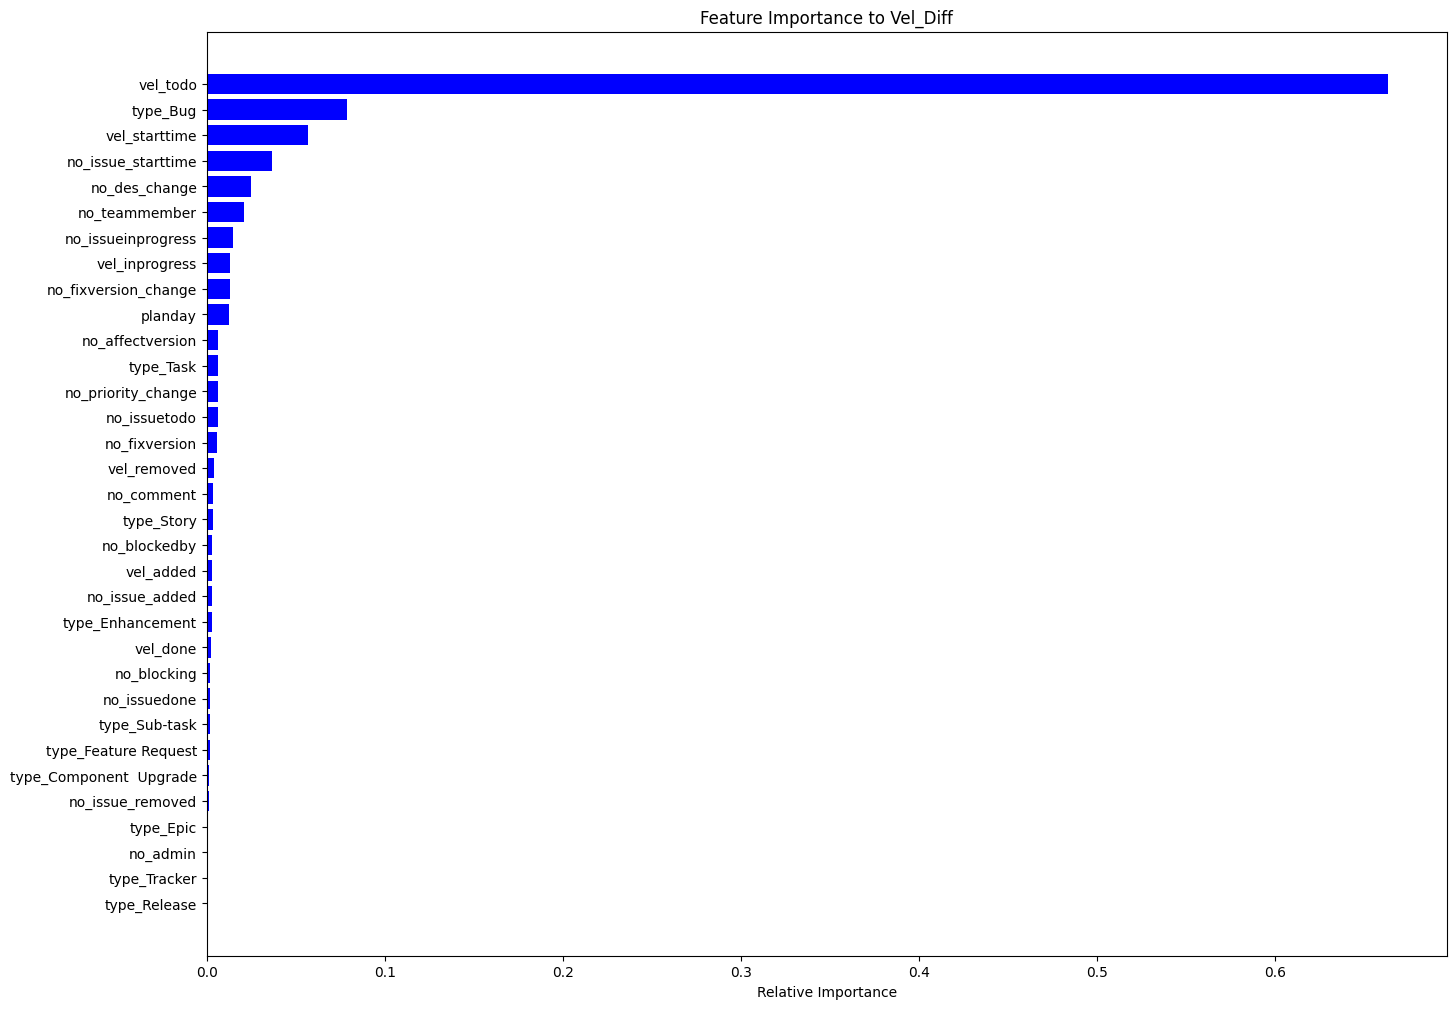

In [17]:
col_drop = ['name','vel_diff','boardid','sprintid']
X = joined_data.drop(col_drop,axis=1)
Y = joined_data.loc[:,'vel_diff']
rfr = RandomForestRegressor()
rfr.fit(X, Y)
features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)  # sort result
plt.figure(figsize=(16,12))
plt.title('Feature Importance to Vel_Diff')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
joined_data.columns

Index(['boardid', 'sprintid', 'name', 'vel_diff', 'planday',
       'no_issue_starttime', 'vel_starttime', 'no_issue_added', 'vel_added',
       'no_issue_removed', 'vel_removed', 'no_issuetodo', 'vel_todo',
       'no_issueinprogress', 'vel_inprogress', 'no_issuedone', 'vel_done',
       'no_admin', 'no_teammember', 'no_comment', 'no_affectversion',
       'no_fixversion', 'no_blocking', 'no_blockedby', 'no_fixversion_change',
       'no_priority_change', 'no_des_change', 'type_Bug',
       'type_Component  Upgrade', 'type_Enhancement', 'type_Epic',
       'type_Feature Request', 'type_Release', 'type_Story', 'type_Sub-task',
       'type_Task', 'type_Tracker'],
      dtype='object')

#### TEST FEATURE CORRELATION

<Axes: >

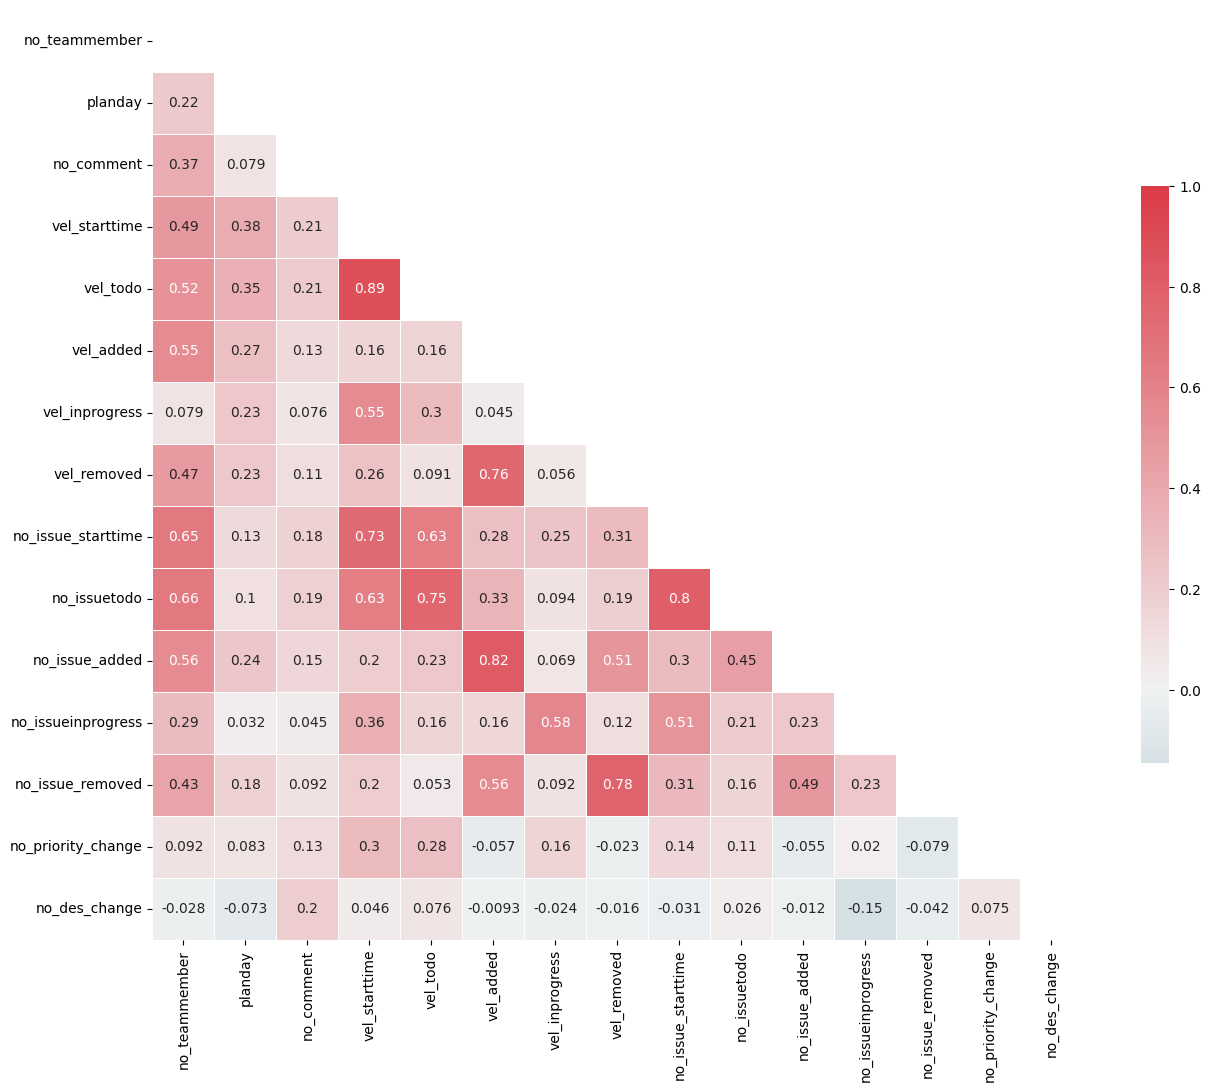

In [20]:
##Correlation analysis
#Correlation plot
df_corr = X.loc[:,['no_teammember', 'planday','no_comment','vel_starttime', 'vel_todo', 'vel_added', 
       'vel_inprogress', 'vel_removed','no_issue_starttime',  'no_issuetodo', 'no_issue_added', 
       'no_issueinprogress','no_issue_removed','no_priority_change','no_des_change']]
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(15, 15))

#Generate correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Determining the Best Prediction Model

#### Define Accuracy Function

In [21]:
def accuracy(y_actual, y_pred):
    acc = {} # store accuracy
    r2 = metrics.r2_score(y_actual, y_pred)
    mae = metrics.mean_absolute_error(y_actual,y_pred)
    rmse = metrics.mean_squared_error(y_actual, y_pred, squared=False)
    acc['r2'] = r2
    acc['mae'] = mae
    acc['rmse'] = rmse
    print('r2 score:',r2)
    print("MAE:",mae)
    print("RMSE:",rmse)

### StandarScale Data

In [22]:
#final_feature = X.loc[:,['planday', 'vel_todo', 'no_teammember', 'vel_starttime', 'no_issue_starttime']]
X_scaled = StandardScaler().fit_transform(df_corr)

#### Data Split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=10)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=10)
print('Number of train data:',len(X_train))
print('Number of validation data:',len(X_val))
print('Number of test data:',len(X_test))

Number of train data: 224
Number of validation data: 57
Number of test data: 71


### Prediction Model Selection

#### KNN

In [24]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [25]:
knn = neighbors.KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
accuracy(y_val, y_pred)

r2 score: 0.27770576787813883
MAE: 6.982456140350878
RMSE: 14.169890318544912


#### Decision Tree Regressor

In [26]:
dt = DecisionTreeRegressor(max_depth=200, random_state=None)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_val)
accuracy(y_val, y_pred)

r2 score: 0.8335127019557823
MAE: 2.526315789473684
RMSE: 6.802992117765974


In [27]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rfr, X_train, y_train, cv=5, scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
sorted(cv_results.keys())
cv_results['test_r2']
print("cross validate acc: ", np.mean(cv_results['test_r2']))

cross validate acc:  0.358467829175155


#### Random Forest Regressor

In [28]:
#Create Prediction Model
#col_drop = ['boardid','sprintid','name','vel_diff']
#X = joined_data.loc[:,['vel_todo','no_teammember','vel_starttime', 'no_issue_starttime']]
#jboss_iter_80.head()
#Y = joined_data.loc[:,"vel_diff"]
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

rfr = RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=1000)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_val)

accuracy(y_val, y_pred_rfr)

r2 score: 0.7665193681574192
MAE: 3.955614035087719
RMSE: 8.056285439811532


## JADI GINI 

## Evaluate Prediction Model

In [29]:
y_test_pred = rfr.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.8088923330847968
MAE: 3.177584507042254
RMSE: 7.146783153841276


In [30]:
y_test_pred = knn.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.6230070336372439
MAE: 4.402190923317685
RMSE: 10.037791570212288


In [31]:
y_test_pred = dt.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.36482454356387584
MAE: 4.605633802816901
RMSE: 13.029219599818006


In [ ]:
joined_data.shape

(352, 37)